In [1]:
import pandas as pd

df= pd.read_csv("Fake_Real_Data.csv")
print(df.shape)
df.head()

(9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [3]:
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [4]:
df['label_num']=df['label'].map({'Fake':0,'Real':1})
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


**Modelling without preprocessing Text Data**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(
    df.Text, 
    df.label_num, 
    test_size=0.2, 
    random_state=0,
    stratify=df.label_num)

**Attempt 1 : Uisng sklearn pipeline to classify the data using KNN classifier and metric as 'euclidian' distance**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

#1. create a pipeline object
clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('knn',KNeighborsClassifier(n_neighbors=10,metric='euclidean'))
])

#2. fit with X_train and y_train
clf.fit(X_train,y_train)

#3. get the predictions for X_test and store it in y_pred
y_pred= clf.predict(X_test)

#4. print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82      1000
           1       0.77      0.97      0.86       980

    accuracy                           0.84      1980
   macro avg       0.86      0.84      0.84      1980
weighted avg       0.86      0.84      0.84      1980



**Attempt 2 : Using sklearn pipeline to classify the data using KNN classifier and metric as 'cosine' distance**

In [14]:
clf= Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('knn',KNeighborsClassifier(n_neighbors=10,metric='cosine'))
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70      1000
           1       0.68      1.00      0.81       980

    accuracy                           0.77      1980
   macro avg       0.84      0.77      0.76      1980
weighted avg       0.84      0.77      0.76      1980



**Attempt 3 : Using sklearn pipeline module to classify data using CountVectorizer with only trigrams and using RandomForest as classifier**

In [16]:
from sklearn.ensemble import RandomForestClassifier

clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('random_forest',(RandomForestClassifier()))
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1000
           1       0.99      0.98      0.99       980

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



**Attempt 4 : using sklearn pipeline to classify data and CountVectorizer for unigrams and bigrams using Multinomial Naive Bayes classifier**

In [18]:
from sklearn.naive_bayes import MultinomialNB

clf= Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('Multi NB',MultinomialNB(alpha=0.75))
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1000
           1       0.98      0.98      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



**Use text preprocessing to remove stop words, punctuations and apply lemmatization**

In [19]:
import spacy
nlp= spacy.load("en_core_web_sm")

def preprocess(text):
    doc=nlp(text)
    filtered_tokens=[]
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [ ]:
df['preprocessed_text']=df['Text'].apply(preprocess)

In [21]:
df.head()

,Text,label,label_num,preprocessed_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,Trump surrogate BRUTALLY Stabs Pathetic VIDE...
1,U.S. conservative leader optimistic of common ...,Real,1,U.S. conservative leader optimistic common gro...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,trump propose U.S. tax overhaul stir concern d...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,Court Forces Ohio allow Millions illegally p...
4,Democrats say Trump agrees to work on immigrat...,Real,1,Democrats Trump agree work immigration bill wa...


**Build a model with preprocessed text**

In [22]:
X_train,X_test,y_train,y_test=train_test_split(
    df.preprocessed_text,
    df.label_num,
    test_size=0.2,
    random_state=0,
    stratify=df.label_num
)

In [24]:
clf=Pipeline([
    ('vectorizer',CountVectorizer(ngram_range=(1,3))),
    ('random_forest',(RandomForestClassifier()))
])

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1000
           1       1.00      0.99      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



**print the confusion matrix**

In [25]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[998,   2],
       [  6, 974]])

Text(58.222222222222214, 0.5, 'Truth')

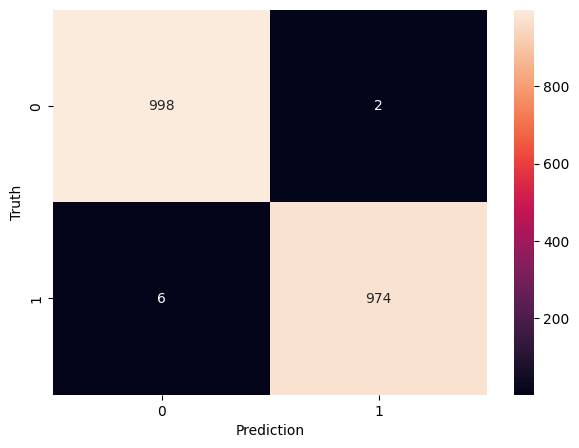

In [26]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

**Final Observations**

•As machine learning algorithms do not work on text data directly, we need to convert them into numeric vectors and feed that into models while training.

•In this process, we convert text into a very high dimensional numeric vector using the technique of Bag of words and we use sklearn CountVectorizer for this.

**Without Pre-Processing Data**

• From the above in most of the cases, we can see that when we have the count vectorizer above trigrams or at trigrams, the performance keeps degrading. The major possible reason for this as the ngram_range keeps increasing, the number of dimensions/features (possible combination of words) also increases enormously and models have the risk of overfitting and resulting in terrible performance.

• For this reason, models like KNN failed terribly when performed with trigrams and using the euclidean distance. K-Nearest Neighbours(KNN) doesn't work well with high-dimensional data because, with a large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. In higher dimensional space, the cost to calculate distance becomes expensive and hence impacts the performance of the model. It performed well for class 1 and had terrible results for Class 0.

• Both recall and F1 scores increase better when trained with the same KNN model but with cosine distance as cosine distance does not get influenced by the number of dimensions as it uses the angle better the two text vectors to calculate the similarity.

• With respect to Naive and RandomForest models, both performed really well, and random forest with trigrams has a better edge on the recall metric.

• As Random Forest uses Bootstrapping(row and column Sampling) with many decision trees and overcomes the high variance and overfitting of high dimensional data and also uses feature importance of words for better classifying the categories.

• The easy calculation of probabilities for the words in the corpus(Bag of words) and storing them in a contingency table is the major reason for the Multinomial NaiveBayes to be a text classification friendly algorithm.

**With Pre-Processing Data**

• Have trained the best model RandomForest on the pre-processed data, but RandomForest with trigrams fails to produce the same results here.

• But the same randomForest with Unigram to Trigram features helps to produce very amazing results and is tops in the entire list with very good F1 scores and Recall scores.

**Machine Learning is like a trial and error scientific method, where we keep trying all the possible algorithms we have and select the one which gives good results and satisfies the requirements like latency, interpretability, etc.**